<h1>Gain Life Challenge</h1>

<h2>Import Dataset</h2>

In [125]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [127]:
df = pd.read_csv(r"C:\Users\justi\Downloads\Anonymized Message Data.csv")
df

,thread_id,timestamp,role,content
0,0,6/7/2024 14:47,supervisor,"Good morning, Ms. Cooper - when you have a few..."
1,0,6/10/2024 13:18,claimant,1. What is your job title/department? Animal C...
2,0,6/10/2024 13:39,supervisor,Thank you!!\n\nEmily Martinez\nSupervisor WC T...
3,0,7/1/2024 19:03,supervisor,Hi Sarah - According to the documents from you...
4,0,7/2/2024 3:35,claimant,I was unable to make it to an appointment on 6...
...,...,...,...,...
3074,946,7/1/2022 13:39,claimant,No thanks
3075,947,10/4/2022 13:30,claimant,"Sarah, if you recall in the documentation ther..."
3076,948,9/5/2024 13:56,claimant,"Hello, Ms.Smith I sent you & sign the paperwor..."
3077,948,9/13/2024 12:32,claimant,"Ms. Smith, I went back to work on September 3r..."


<h2>Data Cleaning & Formatting</h2>

In [130]:
df = df.drop_duplicates()

In [132]:
df = df.dropna()

<p>Drop duplicates while disregarding the seconds from the timestamp column. Noticed duplicate messages were sent a couple seconds after each other. Assuming those messages were mistakes and have been dropped (8 rows affected)</p>

In [135]:
df['timestamp'] = pd.to_datetime(df['timestamp'])
df['timestamp_truncated'] = df['timestamp'].dt.floor('min')  # Remove seconds
df = df.drop_duplicates(subset=['thread_id', 'timestamp_truncated', 'role', 'content'], keep='first')
df = df.drop(columns=['timestamp_truncated'])  # Remove helper column
df

,thread_id,timestamp,role,content
0,0,2024-06-07 14:47:00,supervisor,"Good morning, Ms. Cooper - when you have a few..."
1,0,2024-06-10 13:18:00,claimant,1. What is your job title/department? Animal C...
2,0,2024-06-10 13:39:00,supervisor,Thank you!!\n\nEmily Martinez\nSupervisor WC T...
3,0,2024-07-01 19:03:00,supervisor,Hi Sarah - According to the documents from you...
4,0,2024-07-02 03:35:00,claimant,I was unable to make it to an appointment on 6...
...,...,...,...,...
3074,946,2022-07-01 13:39:00,claimant,No thanks
3075,947,2022-10-04 13:30:00,claimant,"Sarah, if you recall in the documentation ther..."
3076,948,2024-09-05 13:56:00,claimant,"Hello, Ms.Smith I sent you & sign the paperwor..."
3077,948,2024-09-13 12:32:00,claimant,"Ms. Smith, I went back to work on September 3r..."


<p>Get the rows that do not contain 'system' or 'admin' in the 'role' column (3 rows affected)</p>

In [138]:
df = df[~df["role"].str.contains("system|admin", case=False, na=False)]
df

,thread_id,timestamp,role,content
0,0,2024-06-07 14:47:00,supervisor,"Good morning, Ms. Cooper - when you have a few..."
1,0,2024-06-10 13:18:00,claimant,1. What is your job title/department? Animal C...
2,0,2024-06-10 13:39:00,supervisor,Thank you!!\n\nEmily Martinez\nSupervisor WC T...
3,0,2024-07-01 19:03:00,supervisor,Hi Sarah - According to the documents from you...
4,0,2024-07-02 03:35:00,claimant,I was unable to make it to an appointment on 6...
...,...,...,...,...
3074,946,2022-07-01 13:39:00,claimant,No thanks
3075,947,2022-10-04 13:30:00,claimant,"Sarah, if you recall in the documentation ther..."
3076,948,2024-09-05 13:56:00,claimant,"Hello, Ms.Smith I sent you & sign the paperwor..."
3077,948,2024-09-13 12:32:00,claimant,"Ms. Smith, I went back to work on September 3r..."


<p>Order the timestamps by ascending order (earliest first).</p>

In [141]:
df = df.sort_values(by=["thread_id", "timestamp"])

In [145]:
import os

# Define the path to save the file
save_path = r"C:\Users\justi\Downloads\Gain Life Challenge"  # Replace with your desired folder

# Save each DataFrame to the specified path
df.to_csv(os.path.join(save_path, 'output2.csv'), index=True)

<h2>Data Analysis</h2>

<h3>Exploring how many threads were unanswered from each role</h3>

In [87]:
# Filter for threads with only one unique role
role_count_per_thread = df.groupby('thread_id')['role'].nunique().reset_index()
threads_with_no_response = role_count_per_thread[role_count_per_thread['role'] == 1]

# Get the threads that have only one unique role(no response) and group by role
threads_per_role = df[df['thread_id'].isin(threads_with_no_response['thread_id'])].groupby('role')['thread_id'].nunique().reset_index()

threads_per_role = pd.DataFrame(threads_per_role)
threads_per_role

,role,thread_id
0,adjuster,169
1,claimant,340
2,superAdjuster,24
3,supervisor,46


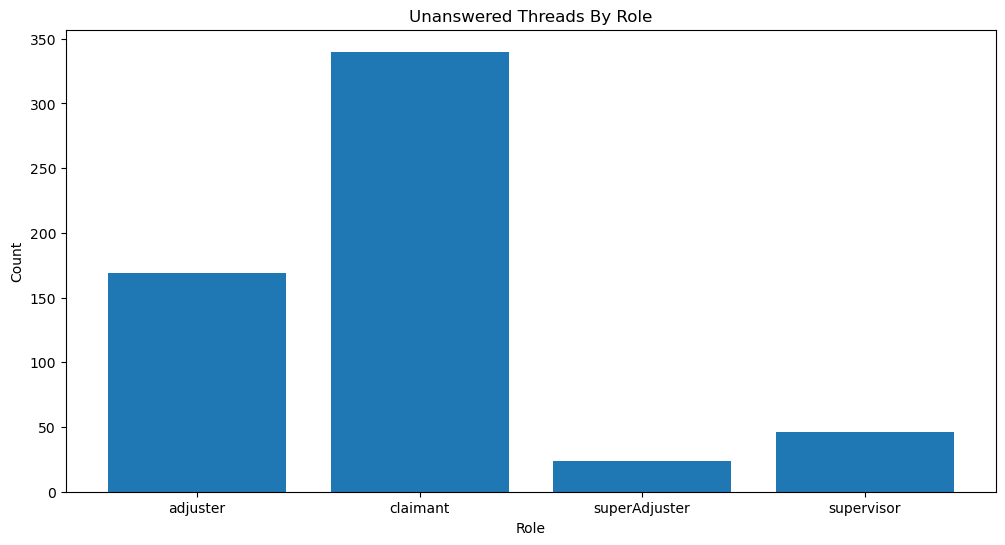

In [89]:
# Plotting threads per role
plt.figure(figsize=(12, 6))
plt.bar(threads_per_role['role'], threads_per_role['thread_id'])
plt.title('Unanswered Threads By Role')
plt.xlabel('Role')
plt.ylabel('Count')
plt.xticks(rotation=0)  # Keeps the x axis labels horizontal
plt.show()

<h3>Calculate which role takes the longest to respond</h3>

<p>Used to find out what causes delays in the claims process</p>

Text(0, 0.5, 'Count of Long Delays')

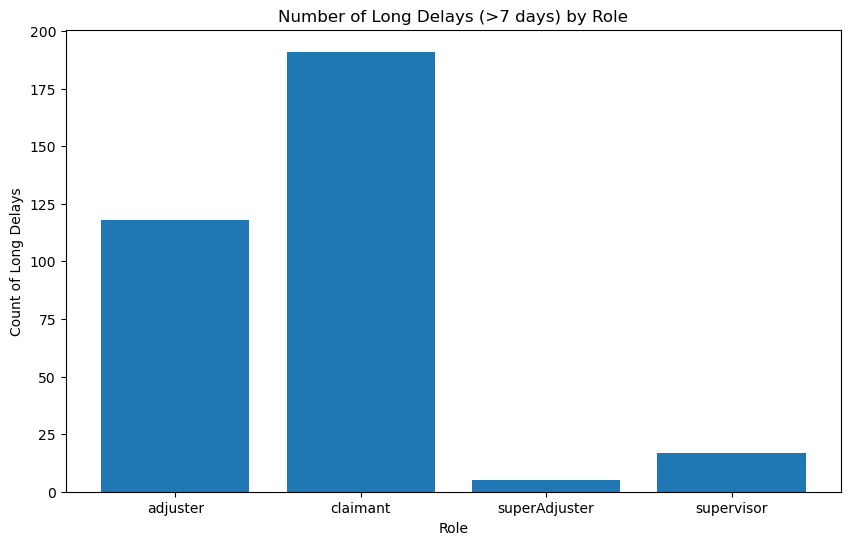

In [93]:
# Calculate time between each message in a thread
df['next_message_time'] = df.groupby('thread_id')['timestamp'].shift(-1)
df['time_to_next_message'] = (df['next_message_time'] - df['timestamp']).dt.total_seconds() / 86400  # number of seconds in a day

# Find top delay points
long_delays = df[df['time_to_next_message'] > 7]  # delays longer than a week
delay_counts = long_delays.groupby(['role']).size().reset_index(name='delay_count')

plt.figure(figsize=(10, 6))
plt.bar(delay_counts['role'], delay_counts['delay_count'])
plt.title('Number of Long Delays (>7 days) by Role')
plt.xlabel('Role')
plt.ylabel('Count of Long Delays')

<h3>Claim duration and message count correlation (Assuming it is the same topic in the threads)</h3>

3
15


Text(0, 0.5, 'Claim Duration (Days)')

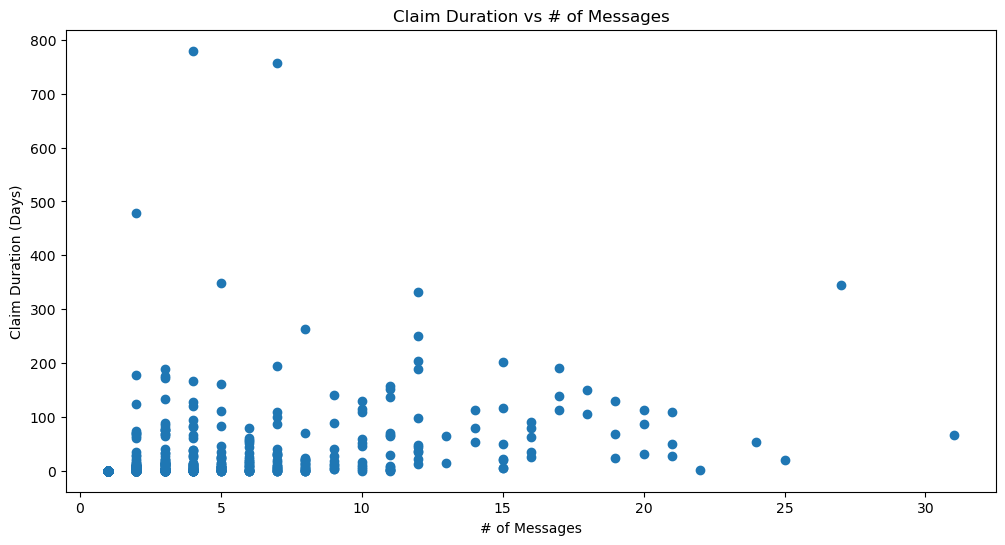

In [21]:
# Calculate claim duration (time from first message to last)
claim_duration = df.groupby('thread_id').agg(
    first_message=('timestamp', 'min'),
    last_message=('timestamp', 'max'),
    message_count=('timestamp', 'count')
)
claim_duration['duration_days'] = (claim_duration['last_message'] - claim_duration['first_message']).dt.days

average_messages_sent = int(claim_duration['message_count'].mean())
average_duration_days = int(claim_duration['duration_days'].mean())
print(average_messages_sent)
print(average_duration_days)

# Create visualization
plt.figure(figsize=(12, 6))
plt.scatter(claim_duration['message_count'], claim_duration['duration_days'])
plt.title('Claim Duration vs # of Messages')
plt.xlabel('# of Messages')
plt.ylabel('Claim Duration (Days)')

<h3>Sentiment analysis on claimants</h3>

In [107]:

# Define sentiment keywords
sentiment_keywords = {
    'happy': ['thank', 'thanks', 'appreciate', 'great', 'good', 'excellent', 'perfect', 'got it', 
              'helpful', 'ty', 'ty!', 'thank you', 'wonderful', 'awesome'],
    
    'dissatisfied': ['wait', 'delay', 'sorry', 'unfortunately', 'problem', 'issue', 'concern', 
                    'worried', 'frustrated', 'annoyed', 'wrong', 'mistake', 'error',
                    'not', "haven't", "didn't", "don't", "can't", "unable", "fail", 
                    'missing', 'lost', 'confused', 'difficult', 'trouble', 'denied', 'reject'],
}

# Function to detect sentiment in a message
def detect_sentiment(text):
    text = text.lower()

    if any(keyword in text for keyword in sentiment_keywords['happy']):
        return 'happy'

    if any(keyword in text for keyword in sentiment_keywords['dissatisfied']):
        return 'dissatisfied'

    return 'neutral'

# Apply sentiment detection to claimant messages only
df['sentiment'] = 'neutral'  # Default value
claimant_filter = df['role'] == 'claimant' #Get only claimant roles
df.loc[claimant_mask, 'sentiment'] = df.loc[claimant_filter, 'content'].apply(detect_sentiment)

# Count sentiments
sentiment_counts = df[claimant_filter].groupby('sentiment').size().reset_index(name='count')

print(sentiment_counts)

      sentiment  count
0  dissatisfied    306
1         happy    755
2       neutral    677


<h3>Explore how many new, existing and closed </h3>

In [121]:
# Extract year and month
df['year_month'] = df['timestamp'].dt.to_period('M')

# Find first and last message for each thread
thread_timeline = df.groupby('thread_id').agg(
    start_date=('timestamp', 'min'),
    end_date=('timestamp', 'max')
)

thread_timeline['start_month'] = thread_timeline['start_date'].dt.to_period('M')
thread_timeline['end_month'] = thread_timeline['end_date'].dt.to_period('M')

all_months = sorted(df['year_month'].unique())

#Initialize df with 0s
monthly_stats = pd.DataFrame(index=all_months)
monthly_stats['new_claims'] = 0
monthly_stats['closed_claims'] = 0
monthly_stats['active_claims'] = 0

# Count new claims by start month
starts_by_month = thread_timeline.groupby('start_month').size()
monthly_stats.loc[starts_by_month.index, 'new_claims'] = starts_by_month.values

# Count closed claims by end month
ends_by_month = thread_timeline.groupby('end_month').size()
monthly_stats.loc[ends_by_month.index, 'closed_claims'] = ends_by_month.values

# Count active claims for each month
for thread_id, row in thread_timeline.iterrows():
    # Get all months between start and end
    active_months = pd.period_range(start=row['start_month'], end=row['end_month'], freq='M')
    
    # Increment active count for each month this thread was active
    for month in active_months:
        if month in monthly_stats.index:
            monthly_stats.loc[month, 'active_claims'] += 1

# Reset index to make year_month a column
monthly_stats = monthly_stats.reset_index()
monthly_stats.rename(columns={'index': 'year_month'}, inplace=True)

monthly_stats

,year_month,new_claims,closed_claims,active_claims,year_month_str
0,2022-05,17,15,17,2022-05
1,2022-06,17,13,19,2022-06
2,2022-07,14,18,20,2022-07
3,2022-08,25,24,27,2022-08
4,2022-09,43,41,46,2022-09
5,2022-10,15,13,20,2022-10
6,2022-11,22,20,29,2022-11
7,2022-12,31,33,40,2022-12
8,2023-01,45,44,52,2023-01
9,2023-02,23,24,31,2023-02


In [149]:
import os

# Define the path to save the file
save_path = r"C:\Users\justi\Downloads\Gain Life Challenge"  # Replace with your desired folder

# Save each DataFrame to the specified path
threads_per_role.to_csv(os.path.join(save_path, 'threads_per_role.csv'), index=True)
delay_counts.to_csv(os.path.join(save_path, 'delay_counts.csv'), index=True)
claim_duration.to_csv(os.path.join(save_path, 'claim_duration.csv'), index=True)
sentiment_counts.to_csv(os.path.join(save_path, 'sentiment_counts.csv'), index=True)
monthly_stats.to_csv(os.path.join(save_path, 'monthly_stats.csv'), index=True)